<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#import-modules" data-toc-modified-id="import-modules-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>import modules</a></span><ul class="toc-item"><li><span><a href="#functions" data-toc-modified-id="functions-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>functions</a></span></li></ul></li><li><span><a href="#import-data" data-toc-modified-id="import-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>import data</a></span><ul class="toc-item"><li><span><a href="#transform-data-from-strings-to-numeric-data" data-toc-modified-id="transform-data-from-strings-to-numeric-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>transform data from strings to numeric data</a></span></li><li><span><a href="#prepare-data-for-model" data-toc-modified-id="prepare-data-for-model-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>prepare data for model</a></span></li></ul></li><li><span><a href="#random-forest-model" data-toc-modified-id="random-forest-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>random forest model</a></span><ul class="toc-item"><li><span><a href="#multinomial-naive-bayes" data-toc-modified-id="multinomial-naive-bayes-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>multinomial naive bayes</a></span></li><li><span><a href="#bernoulli-naive-bayes" data-toc-modified-id="bernoulli-naive-bayes-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>bernoulli naive bayes</a></span></li><li><span><a href="#complement-naive-bayes" data-toc-modified-id="complement-naive-bayes-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>complement naive bayes</a></span></li></ul></li><li><span><a href="#visualize-precision-recall-for-all-models-with-smote-applied-to-data" data-toc-modified-id="visualize-precision-recall-for-all-models-with-smote-applied-to-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>visualize precision recall for all models with smote applied to data</a></span></li><li><span><a href="#no-smote-applied-data-analysis" data-toc-modified-id="no-smote-applied-data-analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>no smote applied data analysis</a></span><ul class="toc-item"><li><span><a href="#prepare-data" data-toc-modified-id="prepare-data-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>prepare data</a></span></li><li><span><a href="#isolation-forest-for-later-anamoly-analysis" data-toc-modified-id="isolation-forest-for-later-anamoly-analysis-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>isolation forest for later anamoly analysis</a></span></li></ul></li><li><span><a href="#training-the-model" data-toc-modified-id="training-the-model-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>training the model</a></span></li><li><span><a href="#predictions" data-toc-modified-id="predictions-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>predictions</a></span></li><li><span><a href="#predictions" data-toc-modified-id="predictions-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>predictions</a></span><ul class="toc-item"><li><span><a href="#multinomial-naive-bayes" data-toc-modified-id="multinomial-naive-bayes-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>multinomial naive bayes</a></span></li><li><span><a href="#bernoulli-naive-bayes" data-toc-modified-id="bernoulli-naive-bayes-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>bernoulli naive bayes</a></span></li><li><span><a href="#complement-naive-bayes" data-toc-modified-id="complement-naive-bayes-8.3"><span class="toc-item-num">8.3&nbsp;&nbsp;</span>complement naive bayes</a></span></li></ul></li><li><span><a href="#visualize-precison-recall-curve-for-weighted-models-with-no-smote-applied" data-toc-modified-id="visualize-precison-recall-curve-for-weighted-models-with-no-smote-applied-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>visualize precison recall curve for weighted models with no smote applied</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# import modules

In [1]:
import warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# import modules for model
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import random
from sklearn import preprocessing
from collections import Counter
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, make_scorer
from sklearn.metrics import average_precision_score, precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import ComplementNB, BernoulliNB, MultinomialNB
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import GridSearchCV

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold



Using TensorFlow backend.


## functions

In [3]:
def display_results(y_test, y_pred):
    labels = np.unique(y_pred)
    confusion_mat = confusion_matrix(y_test, y_pred, labels=labels)
    accuracy = (y_pred == y_test).mean()

    print("Labels:", labels)
    print("Confusion Matrix:\n", confusion_mat)
    print("Accuracy:", accuracy)

In [4]:
def model_results(x):
    results_train = x.evaluate(X_train, y_train)
    print('Training:', results_train)
    results_test = x.evaluate(X_test, y_test)
    print('Test:', results_test)
    

In [5]:
def adjusted_classes(y_scores, t):
    """
    This function adjusts class predictions based on the prediction threshold (t).
    Will only work for binary classification problems.
    """
    return [1 if y >= t else 0 for y in y_scores]

def precision_recall_threshold(p, r, thresholds, t=0.5):
    """
    plots the precision recall curve and shows the current value for each
    by identifying the classifier's threshold (t).
    """
    
    # generate new class predictions based on the adjusted_classes
    # function above and view the resulting confusion matrix.
    y_pred_adj = adjusted_classes(y_scores, t)
    print(pd.DataFrame(confusion_matrix(y_test, y_pred_adj),
                       columns=['pred_neg', 'pred_pos'], 
                       index=['neg', 'pos']))
    
    # plot the curve
    plt.figure(figsize=(8,8))
    plt.title("Precision and Recall curve ^ = current threshold")
    plt.step(r, p, color='b', alpha=0.2,
             where='post')
    plt.fill_between(r, p, step='post', alpha=0.2,
                     color='b')
    plt.ylim([0.5, 1.01]);
    plt.xlim([0.5, 1.01]);
    plt.xlabel('Recall');
    plt.ylabel('Precision');
    
    # plot the current threshold on the line
    close_default_clf = np.argmin(np.abs(thresholds - t))
    plt.plot(r[close_default_clf], p[close_default_clf], '^', c='k',
            markersize=15)

In [6]:
# x=X_train_scaled, y = y_train_scaled, z = y_test_scaled
def cv_score(model, x_train, y_train, y_test, y_pred):
    #CV scores, 10 fold CV
    scores = cross_val_score(model, x_train, y_train, cv=10)
    #Prediction and accuracy
    precision_test = precision_score(y_test, y_pred)
    #Print the summary
    print("Precision: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print ("Test Precision: %0.2f" % (precision_test))

In [7]:
#visualize confusion matrix
def vis_cm(model, X, y, y_pred):
    score = model.score(X, y)
    confusion = confusion_matrix(y, y_pred)
    
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    confusion.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion.flatten()/np.sum(confusion)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(confusion, annot=labels, fmt='', cmap='Blues')
    matrix_title = "Test Accuracy: %0.2f for {model}" % (score)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

In [8]:
# assess metrics of model
def get_metrics(y_test, yhat_classes,yhat_probs):
# accuracy: (tp + tn) / (p + n)
    accuracy = accuracy_score(y_test, yhat_classes)
    print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
    precision = precision_score(y_test, yhat_classes)
    print('Precision: %f' % precision)
# recall: tp / (tp + fn)
    recall = recall_score(y_test, yhat_classes)
    print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
    f1 = f1_score(y_test, yhat_classes)
    print('F1 score: %f' % f1)
# ROC AUC
    auc = roc_auc_score(y_test, yhat_probs)
    print('ROC AUC: %f' % auc)
# confusion matrix
    matrix = confusion_matrix(y_test, yhat_classes)
    print(matrix)

In [9]:
def grid_search_wrapper(refit_score='precision_score'):
    """
    fits a GridSearchCV classifier using refit_score for optimization
    prints classifier performance metrics
    """
    skf = StratifiedKFold(n_splits=3)
    grid_search = GridSearchCV(clf, params, scoring=scorers, refit=refit_score,
                           cv=skf, return_train_score=True, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # make the predictions
    y_pred = grid_search.predict(X_test)

    print('Best params for {}'.format(refit_score))
    print(grid_search.best_params_)

    # confusion matrix on the test data.
    print('\nConfusion matrix of Random Forest optimized for {} on the test data:'.format(refit_score))
    print(pd.DataFrame(confusion_matrix(y_test, y_pred),
                 columns=['pred_neg', 'pred_pos'], index=['neg', 'pos']))
    return grid_search

# import data

In [10]:
df = pd.read_csv('pn_df.csv')

In [11]:
emb_df = pd.read_csv('embedding.csv')

## transform data from strings to numeric data

## prepare data for model 

In [12]:
# convert target data with labelencoder
le = LabelEncoder()
y = df['target'].copy()
le.fit_transform(y)
y = y.astype('category')
# define independent variable
X = df.wordl.copy()
# split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,
                                                     test_size=.2, stratify=y)


In [13]:
# verify shape of data
print('Test label shape:', np.shape(y_test))
print('Train label shape:', np.shape(y_train))

print('Test shape:', np.shape(X_test))
print('Train shape:', np.shape(X_train))


Test label shape: (681,)
Train label shape: (2722,)
Test shape: (681,)
Train shape: (2722,)


In [14]:
#(ngram_range=(1,2)
pipeline = Pipeline([ ('vect', CountVectorizer(ngram_range=(1,2))), 
                     ('tfidf', TfidfTransformer(use_idf=True))])
X_train = pipeline.fit_transform(X_train).todense() 
X_test = pipeline.transform(X_test).todense() 

In [15]:
# verify shape of transformed data
print('Test label shape:', np.shape(y_test))
print('Train label shape:', np.shape(y_train))

print('Test shape:', np.shape(X_test))
print('Train shape:', np.shape(X_train))


Test label shape: (681,)
Train label shape: (2722,)
Test shape: (681, 18145)
Train shape: (2722, 18145)


In [16]:
counter = Counter(y_train)
print(counter)

Counter({1: 2287, 0: 435})


In [17]:
# apply smote to dataset due to imbalance of pos vs neg sentiment
sm = SMOTE(random_state=42)
X_train, y_train = sm.fit_resample(X_train, y_train)

# summarize the new class distribution
counter = Counter(y_train)
print(counter)

Counter({1: 2287, 0: 2287})


In [18]:
# verify new shape of data
print('Test label shape:', np.shape(y_test))
print('Train label shape:', np.shape(y_train))
print('Test shape:', np.shape(X_test))
print('Train shape:', np.shape(X_train))

counter = Counter(y_train)
print(counter)

#assign variable to np.shape tuple, width dimension
input_dimension = np.shape(X_train)
count_terms = input_dimension[1]
print(count_terms)

Test label shape: (681,)
Train label shape: (4574,)
Test shape: (681, 18145)
Train shape: (4574, 18145)
Counter({1: 2287, 0: 2287})
18145


# perform grid search to find optimal perameters for random forest model

In [20]:
clf = RandomForestClassifier(n_jobs=-1)
    
params = {
        'criterion': ['gini', 'entropy'],
        'min_samples_split': [3, 5], 
        'n_estimators' : [50, 100, 300, 500],
        'max_depth': [10, 25, 30, 50],
        
     
    }
scorers = {
    'precision_score': make_scorer(precision_score),
    'recall_score': make_scorer(recall_score),
    'accuracy_score': make_scorer(accuracy_score)
    }

In [21]:
grid_search_clf = grid_search_wrapper(refit_score='precision_score')

Best params for precision_score
{'criterion': 'gini', 'max_depth': 50, 'min_samples_split': 3, 'n_estimators': 500}

Confusion matrix of Random Forest optimized for precision_score on the test data:
     pred_neg  pred_pos
neg        28        81
pos         7       565


In [22]:
results = pd.DataFrame(grid_search_clf.cv_results_)
results = results.sort_values(by='mean_test_precision_score', ascending=False)
results[['mean_test_precision_score', 'mean_test_recall_score', 
         'mean_test_accuracy_score', 'param_max_depth', 
          'param_min_samples_split', 
         'param_n_estimators']].round(3).head()

,mean_test_precision_score,mean_test_recall_score,mean_test_accuracy_score,param_max_depth,param_min_samples_split,param_n_estimators
27,0.858,0.980,0.904,50,3,500
30,0.858,0.981,0.905,50,5,300
31,0.857,0.979,0.902,50,5,500
26,0.857,0.980,0.903,50,3,300
24,0.856,0.981,0.903,50,3,50


In [23]:
y_scores = grid_search_clf.predict_proba(X_test)[:, 1]


## assess precision/ recall on model to find optimal threshold

In [24]:
p, r, thresholds = precision_recall_curve(y_test, y_scores)

     pred_neg  pred_pos
neg        75        34
pos       104       468


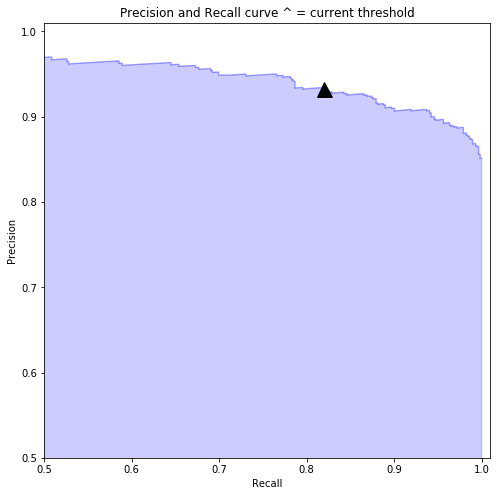

In [25]:
precision_recall_threshold(p, r, thresholds, 0.7)

# random forest model 
                                 

In [113]:
# Instantiate random forest on balanced smote data
rf_model = RandomForestClassifier(n_jobs=-1, 
                                  criterion= 'gini', max_depth=50, min_samples_split=3, 
                                  n_estimators=500)

# Fit the model to training data
rf_model = rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)
print(rf_model.score(X_train, y_train))
print(rf_model.score(X_test, y_test))
print(classification_report(y_test, y_pred_rf))


0.9481853957149103
0.8678414096916299
              precision    recall  f1-score   support

           0       0.77      0.25      0.38       109
           1       0.87      0.99      0.93       572

    accuracy                           0.87       681
   macro avg       0.82      0.62      0.65       681
weighted avg       0.86      0.87      0.84       681



In [167]:
y_pred_new_threshold = (rf_model.predict_proba(X_test)[:,1]>=0.8).astype(int)


              precision    recall  f1-score   support

           0       0.19      0.98      0.32       109
           1       0.98      0.22      0.36       572

    accuracy                           0.34       681
   macro avg       0.59      0.60      0.34       681
weighted avg       0.86      0.34      0.36       681



In [168]:
#cv scores

cv_score(rf_model, X_train, y_train, y_test, y_pred_new_threshold)

Precision: 0.91 (+/- 0.15)
Test Precision: 0.98


In [169]:
confusion_matrix(y_test, y_pred_rf)

array([[ 27,  82],
       [  8, 564]])

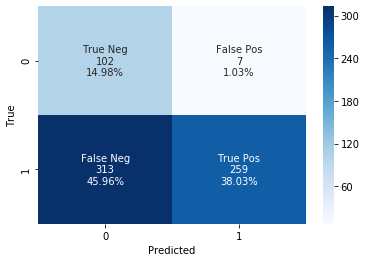

In [30]:
vis_cm(rf_model, X_test, y_test, y_pred_new_threshold)

In [31]:
average_precision_rf = average_precision_score(y_test, y_pred_new_threshold)
rf_precision, rf_recall, rf_thresholds = precision_recall_curve(y_test, y_pred_new_threshold)
rf_f1 = f1_score(y_test, y_pred_new_threshold)
rf_pauc = auc(rf_recall, rf_precision)
print('Random Forest: f1=%.3f auc=%.3f' % (rf_f1, rf_pauc))

Decision Tree: f1=0.618 auc=0.943


## multinomial naive bayes

In [363]:
# Instantiate multinomial bayes
mnb = MultinomialNB(alpha=0.1, fit_prior=True)

# Fit the model to training data
mnb_model = mnb.fit(X_train, y_train)

# Predict on test set
y_pred_mnb = mnb_model.predict(X_test)
print(mnb_model.score(X_train, y_train))
print(mnb_model.score(X_test, y_test))
print(classification_report(y_test, y_pred_mnb))

0.9958460865763008
0.869309838472834
              precision    recall  f1-score   support

           0       0.58      0.65      0.61       109
           1       0.93      0.91      0.92       572

    accuracy                           0.87       681
   macro avg       0.76      0.78      0.77       681
weighted avg       0.88      0.87      0.87       681



In [364]:
#did not perform well on negative sentiment data(also smaller class)

In [365]:
# get accuracy scores for training data vs test data
cv_score(mnb_model, X_train, y_train, y_test, y_pred_mnb)

Precision: 0.96 (+/- 0.01)
Test Precision: 0.93


In [366]:
confusion_matrix(y_test, y_pred_mnb)

array([[ 71,  38],
       [ 51, 521]])

In [367]:
y_pred_new_threshold = (mnb_model.predict_proba(X_test)[:,1]>=0.945).astype(int)

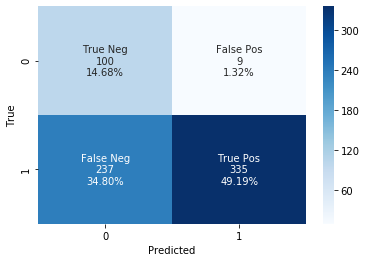

In [368]:
vis_cm(mnb_model, X_test, y_test, y_pred_new_threshold)


In [369]:
# threshold adjustment over 0.9 increased performance on negative sentiment but misclassified a
# high percentage of positive sentiment data points

Train AUC: 0.9993679222249903
Test AUC: 0.8669644575607879


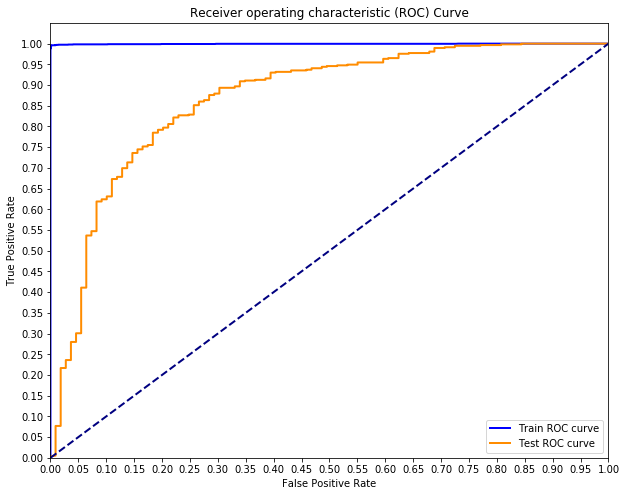

In [370]:

#plot roc/auc
test_probs = mnb_model.predict_proba(X_test)
preds  = test_probs[:,1]
train_probs = mnb_model.predict_proba(X_train)
y_train_score  = train_probs[:,1]


train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, preds)

dt_fpr, dt_tpr, dt_th = roc_curve(y_test, preds)

print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [371]:
average_precision_mb = average_precision_score(y_test, y_pred_new_threshold)
mb_precision, mb_recall, mb_thresholds = precision_recall_curve(y_test, y_pred_new_threshold)
mb_f1 = f1_score(y_test, y_pred_new_threshold)
mb_pauc = auc(mb_recall, mb_precision)
print('Multinomial Bayes: f1=%.3f auc=%.3f' % (mb_f1, mb_pauc))

Multinomial Bayes: f1=0.731 auc=0.954


## bernoulli naive bayes

In [372]:
# Instantiate bernoulli naive bayes on og data
bnb = BernoulliNB(alpha=0.01, fit_prior=True, )

# Fit the model to training data
bnb_model = bnb.fit(X_train, y_train)

# Predict on test set
y_pred_bnb = bnb_model.predict(X_test)
print(bnb_model.score(X_train, y_train))
print(bnb_model.score(X_test, y_test))
print(classification_report(y_test, y_pred_bnb))

0.9965019676432006
0.8663729809104258
              precision    recall  f1-score   support

           0       0.70      0.29      0.41       109
           1       0.88      0.98      0.92       572

    accuracy                           0.87       681
   macro avg       0.79      0.63      0.67       681
weighted avg       0.85      0.87      0.84       681



In [373]:
# cv scores
cv_score(bnb_model, X_train, y_train, y_test, y_pred_bnb)

Precision: 0.99 (+/- 0.01)
Test Precision: 0.88


In [374]:
confusion_matrix(y_test, y_pred_bnb)

array([[ 32,  77],
       [ 14, 558]])

In [375]:
y_pred_new_threshold = (bnb_model.predict_proba(X_test)[:,1]>=0.99).astype(int)

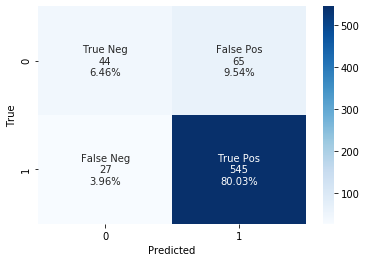

In [376]:
vis_cm(bnb_model, X_test, y_test, y_pred_new_threshold)

In [377]:
average_precision_bb = average_precision_score(y_test, y_pred_new_threshold)
bb_precision, bb_recall, bb_thresholds = precision_recall_curve(y_test, y_pred_new_threshold)
bb_f1 = f1_score(y_test, y_pred_new_threshold)
bb_pauc = auc(bb_recall, bb_precision)
print('Bernoulli Bayes: f1=%.3f auc=%.3f' % (bb_f1, bb_pauc))

Bernoulli Bayes: f1=0.922 auc=0.943


In [48]:
# bernoulli bayes underperforms on negative sentiment classification

## complement naive bayes

In [407]:
# Instantiate 
cnb = ComplementNB(alpha=0.075 , fit_prior=True, )

cnb_model = cnb.fit(X_train, y_train)

# Predict on test set
y_pred_cnb = cnb_model.predict(X_test)
print(cnb_model.score(X_train, y_train))
print(cnb_model.score(X_test, y_test))
print(classification_report(y_test, y_pred_cnb))

0.9962833406209007
0.8722466960352423
              precision    recall  f1-score   support

           0       0.59      0.65      0.62       109
           1       0.93      0.91      0.92       572

    accuracy                           0.87       681
   macro avg       0.76      0.78      0.77       681
weighted avg       0.88      0.87      0.87       681



In [408]:
confusion_matrix(y_test, y_pred_cnb)

array([[ 71,  38],
       [ 49, 523]])

In [409]:
y_pred_new_threshold = (cnb_model.predict_proba(X_test)[:,1]>=0.75).astype(int)

In [410]:
confusion_matrix(y_test, y_pred_new_threshold)

array([[ 81,  28],
       [ 97, 475]])

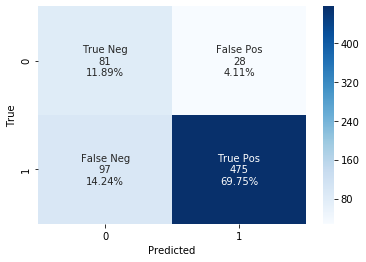

In [411]:
vis_cm(cnb_model, X_test, y_test, y_pred_new_threshold)

Complement Naive Bayes(0.83): f1=0.855 auc=0.122
Complement Naive Bayes(0.5): f1=0.918 auc=0.958


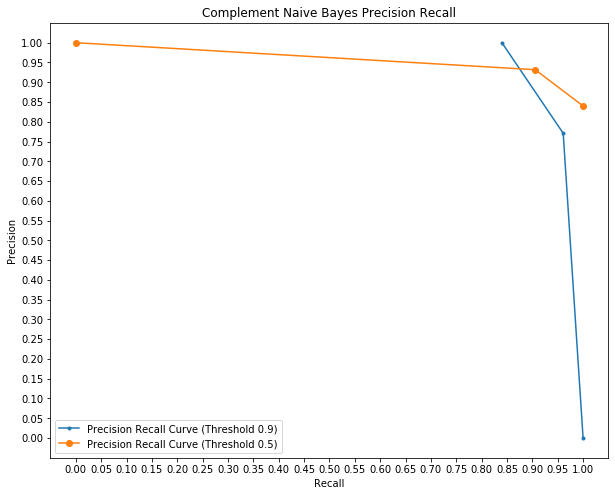

Average precision-recall score for chosen threshold: 0.92


In [173]:
average_precision_cb = average_precision_score(y_test, y_pred_new_threshold)
cbprecision, cbrecall, cbthresholds = precision_recall_curve(y_test, y_pred_new_threshold)
cbf1 = f1_score(y_test, y_pred_new_threshold)
cbpauc = auc(cbprecision, cbrecall,)
print('Complement Naive Bayes(0.83): f1=%.3f auc=%.3f' % (cbf1, cbpauc))

average_precision = average_precision_score(y_test, y_pred_cnb)
preprecision, prerecall, prethresholds = precision_recall_curve(y_test, y_pred_cnb)
pref1 = f1_score(y_test, y_pred_cnb)
prepauc = auc(prerecall, preprecision)
print('Complement Naive Bayes(0.5): f1=%.3f auc=%.3f' % (pref1, prepauc))

plt.figure(figsize=(10, 8))
lw = 2

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
ns_probs = [0 for _ in range(len(y_test))]
# plot the precision-recall curves
plt.plot(cbprecision, cbrecall, marker='.', label='Precision Recall Curve (Threshold 0.9)')
plt.plot(prerecall, preprecision, marker='o', label='Precision Recall Curve (Threshold 0.5)')
                                                                # axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# title
plt.title('Complement Naive Bayes Precision Recall')
# show the plot
plt.show()
print('Average precision-recall score for chosen threshold: {0:0.2f}'.format(
      average_precision))

Train AUC: 0.999793704803619
Test AUC: 0.7856867902739463


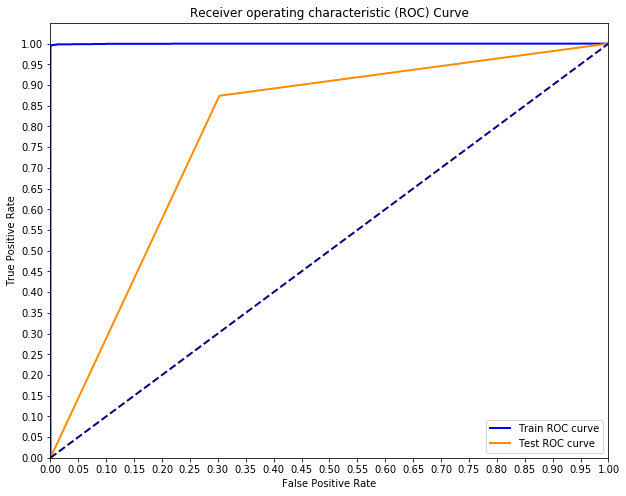

In [57]:
preds = y_pred_new_threshold
train_probs = cnb_model.predict_proba(X_train)
y_train_score  = train_probs[:,1]


train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, preds)

dt_fpr, dt_tpr, dt_th = roc_curve(y_test, preds)

print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# visualize precision recall for all models with smote applied to data

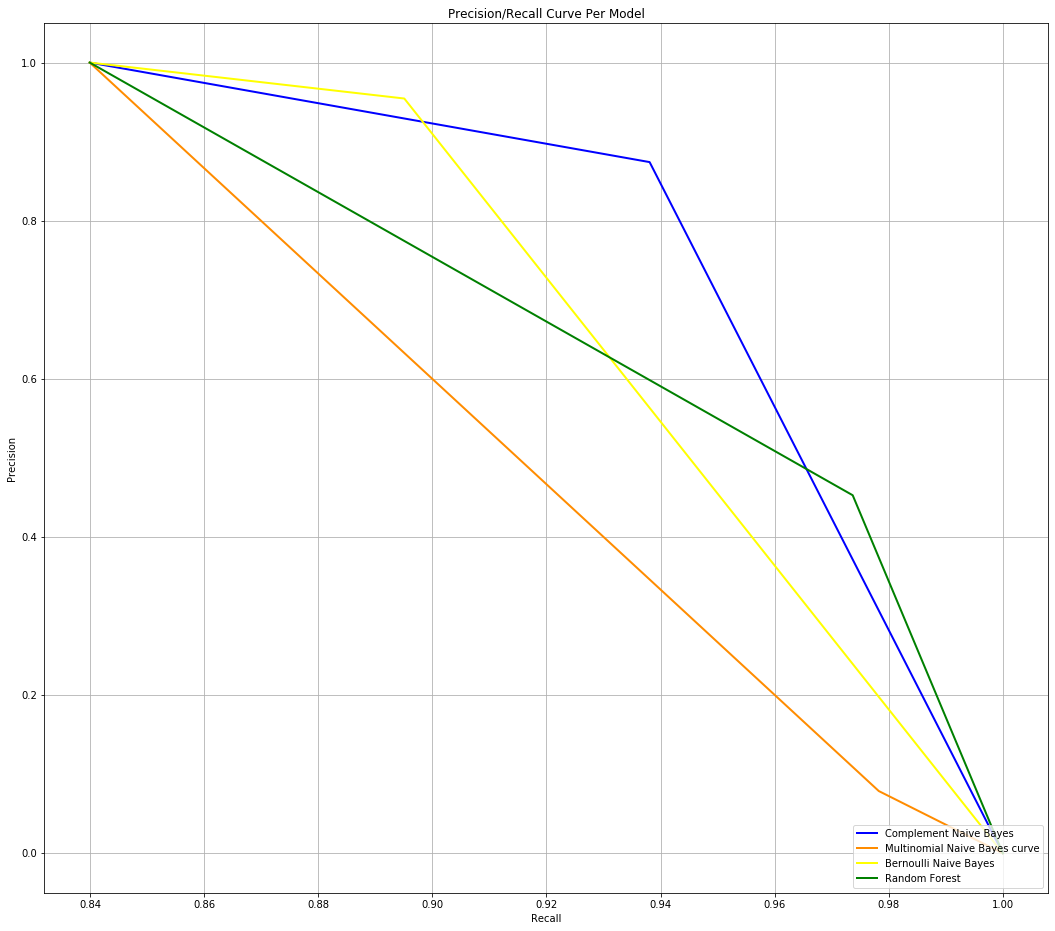

In [60]:
plt.figure(figsize=(18, 16))
lw = 2

plt.plot(cbprecision, cbrecall, color='blue',
         lw=lw, label='Complement Naive Bayes')
plt.plot(mb_precision, mb_recall, color='darkorange',
         lw=lw, label='Multinomial Naive Bayes curve')
plt.plot(bb_precision, bb_recall, color='yellow',
         lw=lw, label='Bernoulli Naive Bayes')
plt.plot(rf_precision, rf_recall, color='green',
         lw=lw, label='Random Forest')

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision/Recall Curve Per Model')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# no smote applied data analysis 

## prepare data

In [61]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import numpy as np

In [62]:
y = y.astype('category')
# split data 
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, random_state=42,
                                                     test_size=.2, stratify=y)
# build TFIDF features on tweet with tfidf vectorizer
pipeline = Pipeline([ ('vect', CountVectorizer(ngram_range=(1,2))), 
                     ('tfidf', TfidfTransformer(use_idf=True)), ])
X3_train = pipeline.fit_transform(X3_train).todense() 
X3_test = pipeline.transform(X3_test).todense() 
X3_train_df = pd.DataFrame(X3_train)
X3_test_df = pd.DataFrame(X3_test)

In [63]:
# get class weights for use in model in lieu of smote
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced', np.unique(y3_train), y3_train)
print(class_weights)

[3.12873563 0.59510275]


In [64]:
# verify new shape of data
print('Test label shape:', np.shape(y3_test))
print('Train label shape:', np.shape(y3_train))
print('Test shape:', np.shape(X3_test))
print('Train shape:', np.shape(X3_train))

counter = Counter(y3_train)
print(counter)

#assign variable to np.shape tuple, width dimension
input_dimension = np.shape(X3_train)
count_terms = input_dimension[1]
print(count_terms)

Test label shape: (681,)
Train label shape: (2722,)
Test shape: (681, 18145)
Train shape: (2722, 18145)
Counter({1: 2287, 0: 435})
18145


In [65]:
# assess class distribution for prior / weights
counter = Counter(y3_train)
print(counter)
print(len(y3_train))
prob1= 2279/2713
prob0=434/2713
print (prob1)
print (prob0)

Counter({1: 2287, 0: 435})
2722
0.8400294876520457
0.15997051234795429


In [66]:
# show the distribution
print('overall class distribution')
print(y.value_counts(normalize=True))
print('y_train class distribution')
print(y3_train.value_counts(normalize=True))
print('y_test class distribution')
print(y3_test.value_counts(normalize=True))

overall class distribution
1    0.840141
0    0.159859
Name: target, dtype: float64
y_train class distribution
1    0.840191
0    0.159809
Name: target, dtype: float64
y_test class distribution
1    0.839941
0    0.160059
Name: target, dtype: float64


## isolation forest for later anamoly analysis

# training the model
if_clf = IsolationForest(n_estimators=100, random_state=42 )
if_clf.fit(X3_train_df)

output_table = pd.DataFrame(if_clf.predict(X3_train))

# predictions
y_pred_train = if_clf.predict(X3_train_df)
y_pred_test = if_clf.predict(X3_test_df)
output_table.describe()

# predictions
#replace -1 with 0
d = {1: 1, -1: 0}
y_pred_train = output_table.replace(d)
y_pred_train

y_pred_test = if_clf.predict(X3_test_df)


y_pred_train

y_pred_test.values

print(classification_report(y3_train, y_pred_train))

## multinomial naive bayes

In [283]:
# Instantiate multinomial bayes
mnb = MultinomialNB(alpha=.01, fit_prior=True)

# Fit the model to training data
mnb_model = mnb.fit(X3_train, y3_train)

# Predict on test set
y_pred_mnb = mnb_model.predict(X3_test)
print(mnb_model.score(X3_train, y3_train))
print(mnb_model.score(X3_test, y3_test))
print(classification_report(y_test, y_pred_mnb))

0.9963262307127112
0.8678414096916299
              precision    recall  f1-score   support

           0       0.64      0.40      0.49       109
           1       0.89      0.96      0.92       572

    accuracy                           0.87       681
   macro avg       0.77      0.68      0.71       681
weighted avg       0.85      0.87      0.86       681



In [284]:
# get accuracy scores for training data vs test data
cv_score(mnb_model, X3_train, y3_train, y3_test, y_pred_mnb)

Precision: 0.73 (+/- 0.06)
Test Precision: 0.89


In [285]:
confusion_matrix(y3_test, y_pred_mnb)

array([[ 44,  65],
       [ 25, 547]])

In [286]:
y3_pred_new_threshold = (mnb_model.predict_proba(X3_test)[:,1]>=0.95).astype(int)

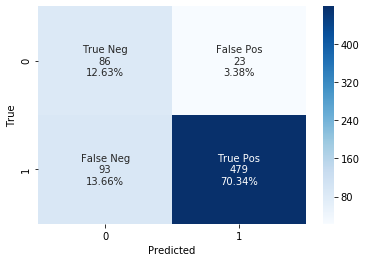

In [287]:
vis_cm(mnb_model, X3_test, y3_test, y3_pred_new_threshold)

In [149]:
average_precision_mb2 = average_precision_score(y3_test, y3_pred_new_threshold)
mb2_precision, mb2_recall, mb2_thresholds = precision_recall_curve(y3_test, y3_pred_new_threshold)
mb2_f1 = f1_score(y3_test, y3_pred_new_threshold)
mb2_pauc = auc(mb2_recall, mb2_precision)
print('Multinomial Bayes: f1=%.3f auc=%.3f' % (mb2_f1, mb2_pauc))

Multinomial Bayes: f1=0.752 auc=0.934


In [150]:
# threshold adjustment over 0.9 increased performance on negative sentiment but 
# increased the false negatives substantially


Train AUC: 0.9726791610753434
Test AUC: 0.7795839481619298


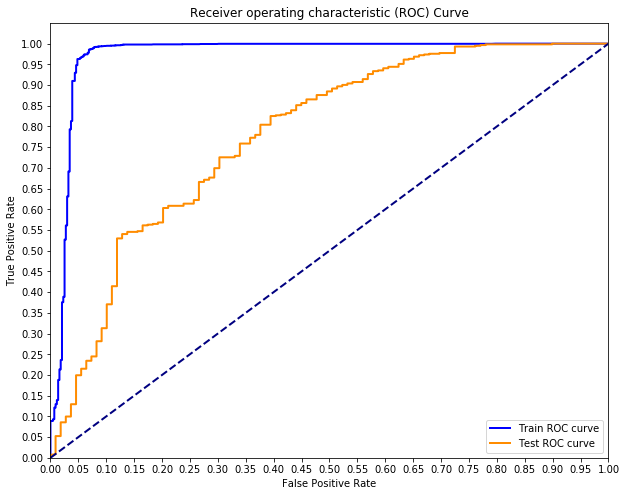

In [151]:

#plot roc/auc
test_probs = mnb_model.predict_proba(X3_test)
preds  = test_probs[:,1]
train_probs = mnb_model.predict_proba(X3_train)
y_train_score  = train_probs[:,1]


train_fpr, train_tpr, train_thresholds = roc_curve(y3_train, y_train_score)
test_fpr, test_tpr, test_thresholds = roc_curve(y3_test, preds)

dt_fpr, dt_tpr, dt_th = roc_curve(y3_test, preds)

print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## bernoulli naive bayes

In [338]:
# Instantiate bernoulli naive bayes on og data
bnb = BernoulliNB(alpha=0.01, class_prior=[0.84, 0.16] , fit_prior=True, )

# Fit the model to training data
bnb_model = bnb.fit(X3_train, y3_train)

# Predict on test set
y_pred_bnb = bnb_model.predict(X3_test)
print(bnb_model.score(X3_train, y3_train))
print(bnb_model.score(X3_test, y3_test))
print(classification_report(y_test, y_pred_bnb))

0.9959588537839824
0.8663729809104258
              precision    recall  f1-score   support

           0       0.57      0.63      0.60       109
           1       0.93      0.91      0.92       572

    accuracy                           0.87       681
   macro avg       0.75      0.77      0.76       681
weighted avg       0.87      0.87      0.87       681



In [339]:
# cv scores
cv_score(bnb_model, X3_train, y3_train, y3_test, y_pred_bnb)

Precision: 0.67 (+/- 0.06)
Test Precision: 0.93


In [340]:
confusion_matrix(y3_test, y_pred_bnb)

array([[ 69,  40],
       [ 51, 521]])

In [344]:
y3_pred_new_threshold = (bnb_model.predict_proba(X3_test)[:,1]>=0.7).astype(int)

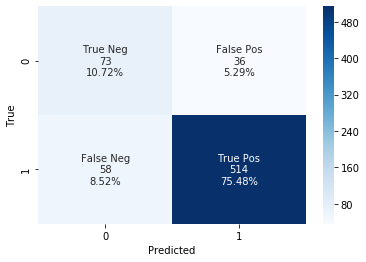

In [345]:
vis_cm(bnb_model, X3_test, y3_test, y3_pred_new_threshold)

In [346]:
average_precision_bb2 = average_precision_score(y3_test, y3_pred_new_threshold)
bb2_precision, bb2_recall, bb2_thresholds = precision_recall_curve(y3_test, y3_pred_new_threshold)
bb2_f1 = f1_score(y3_test, y3_pred_new_threshold)
bb2_pauc = auc(bb2_recall, bb2_precision)
print('Bernoulli Bayes: f1=%.3f auc=%.3f' % (bb2_f1, bb2_pauc))

Bernoulli Bayes: f1=0.916 auc=0.959


In [158]:
# bernoulli bayes underperforms on negative sentiment classification even with adjusted threshold

## complement naive bayes

In [414]:
#classifier was designed to correct the “severe assumptions” made by the standard Multinomial Naive Bayes classifier. It is particularly suited for imbalanced data sets
# Instantiate bernoulli naive bayes on og data
cnb = ComplementNB(alpha=0.025, class_prior=[0.16, 0.84] , fit_prior=True, )

cnb_model = cnb.fit(X3_train, y3_train)

# Predict on test set
y_pred_cnb = cnb_model.predict(X3_test)
print(cnb_model.score(X3_train, y3_train))
print(cnb_model.score(X3_test, y3_test))
print(classification_report(y3_test, y_pred_cnb))

0.994121969140338
0.8604992657856094
              precision    recall  f1-score   support

           0       0.56      0.64      0.60       109
           1       0.93      0.90      0.92       572

    accuracy                           0.86       681
   macro avg       0.74      0.77      0.76       681
weighted avg       0.87      0.86      0.86       681



In [415]:
confusion_matrix(y3_test, y_pred_cnb)

array([[ 70,  39],
       [ 56, 516]])

In [418]:
y3_pred_new_threshold = (cnb_model.predict_proba(X3_test)[:,1]>=0.75).astype(int)

In [419]:
confusion_matrix(y3_test, y3_pred_new_threshold)

array([[ 89,  20],
       [ 99, 473]])

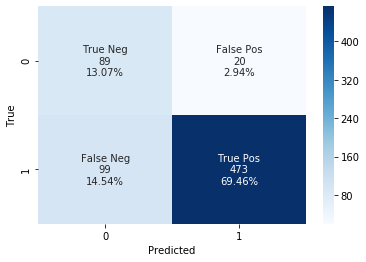

In [420]:
vis_cm(cnb_model, X3_test, y3_test, y3_pred_new_threshold)

In [350]:
cb2average_acc = accuracy_score(y_test, y3_pred_new_threshold)
print('accuracy for model: ', cb2average_acc)

accuracy for model:  0.8619676945668135


Complement Naive Bayes(0.83): f1=0.891 auc=0.965
Complement Naive Bayes(0.5): f1=0.919 auc=0.956


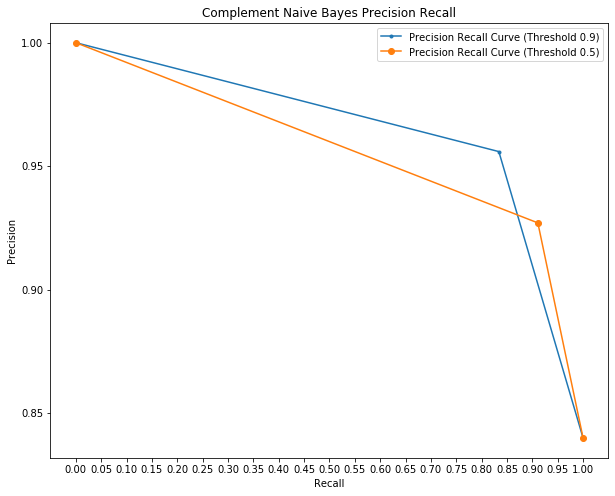

Average precision-recall score for chosen threshold: 0.94


In [276]:
cb2average_precision = average_precision_score(y_test, y3_pred_new_threshold)
cb2precision, cb2recall, cb2thresholds = precision_recall_curve(y_test, y3_pred_new_threshold)
cb2f1 = f1_score(y_test, y3_pred_new_threshold)
cb2pauc = auc(cb2recall, cb2precision)
print('Complement Naive Bayes(0.83): f1=%.3f auc=%.3f' % (cb2f1, cb2pauc))

preaverage_precision = average_precision_score(y_test, y_pred_cnb)
preprecision, prerecall, prethresholds = precision_recall_curve(y_test, y_pred_cnb)
pref1 = f1_score(y_test, y_pred_cnb)
prepauc = auc(prerecall, preprecision)
print('Complement Naive Bayes(0.5): f1=%.3f auc=%.3f' % (pref1, prepauc))

plt.figure(figsize=(10, 8))
lw = 2

plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
ns_probs = [0 for _ in range(len(y_test))]
# plot the precision-recall curves
plt.plot(cb2recall, cb2precision, marker='.', label='Precision Recall Curve (Threshold 0.9)')
plt.plot(prerecall, preprecision, marker='o', label='Precision Recall Curve (Threshold 0.5)')
                                                                # axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# title
plt.title('Complement Naive Bayes Precision Recall')
# show the plot
plt.show()
print('Average precision-recall score for chosen threshold: {0:0.2f}'.format(
      cb2average_precision))

Train AUC: 0.999672310761978
Test AUC: 0.8160406107653815


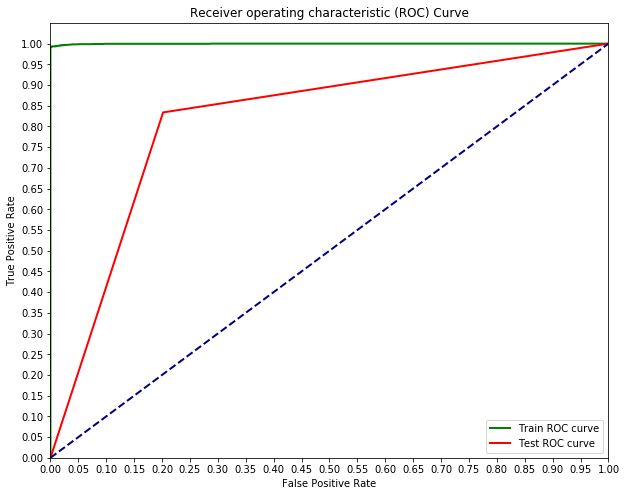

In [277]:
preds = y3_pred_new_threshold
train_probs = cnb_model.predict_proba(X3_train)
y_train_score  = train_probs[:,1]


train_fpr, train_tpr, train_thresholds = roc_curve(y3_train, y_train_score)
test_fpr, test_tpr, test_thresholds = roc_curve(y3_test, preds)

dt_fpr, dt_tpr, dt_th = roc_curve(y3_test, preds)

print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='green',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='red',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# visualize precison recall curve for weighted models with no smote applied

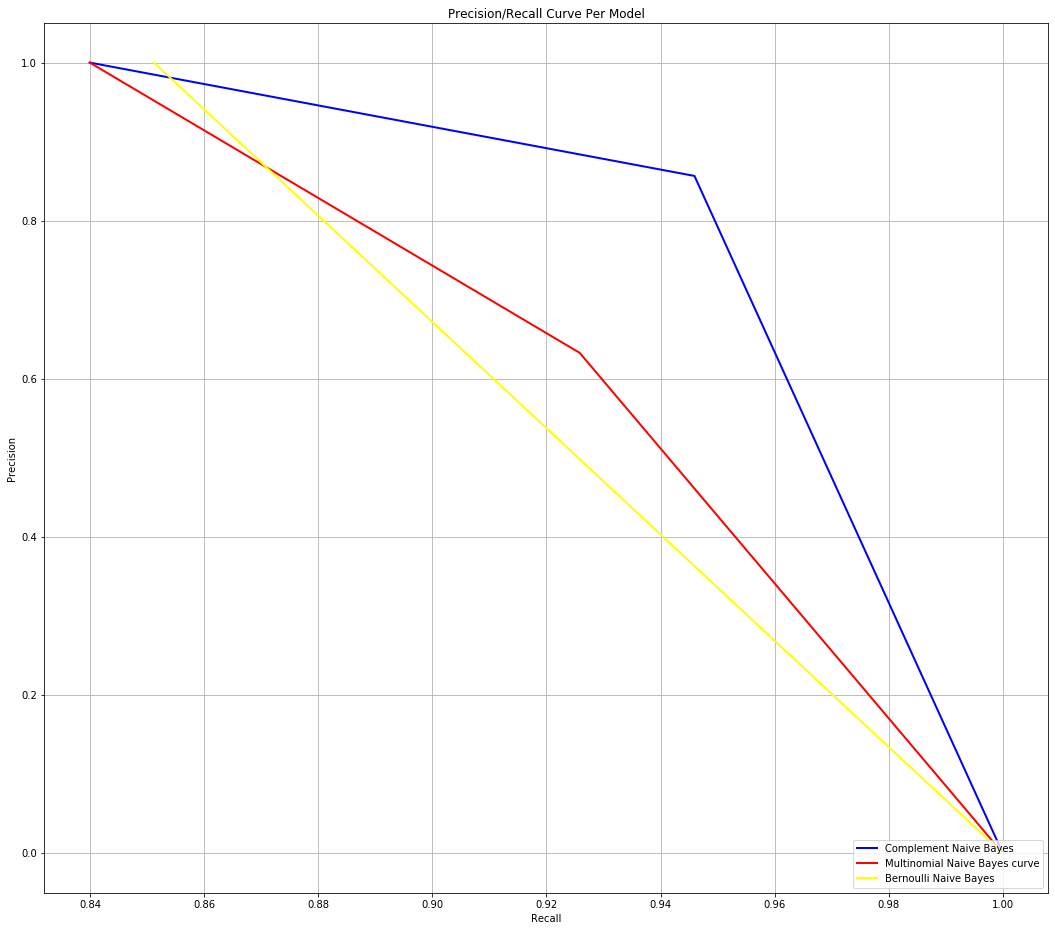

In [166]:
plt.figure(figsize=(18, 16))
lw = 2

plt.plot(cb2precision, cb2recall, color='blue',
         lw=lw, label='Complement Naive Bayes')
plt.plot(mb2_precision, mb2_recall, color='red',
         lw=lw, label='Multinomial Naive Bayes curve')
plt.plot(bb2_precision, bb2_recall, color='yellow',
         lw=lw, label='Bernoulli Naive Bayes')


# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision/Recall Curve Per Model')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [ ]:
def main():

    X, Y = read_corpus(args.input, args.binary)

    Xtrain, Xtest, Ytrain, Ytest = shuffle_split(X, Y, 0.8)

    prior_prob = prior_probabilities(Y)
    info('Prior probabilities per class: {0}'.format(prior_prob))

    classifier = feature_union(count=True, tfidf=True, textstats=True)
    classifier.fit(Xtrain, Ytrain)  # fit the classifier on the training set
    Yguess = classifier.predict(Xtest)  # predict the labels on the test set
    posterior_prob = classifier.predict_proba(Xtest)  # calculate posterior probabilities

    df = tabular_results(Xtest, Ytest, Yguess, prior_prob, posterior_prob)
    with pd.option_context('display.max_rows', 10, 'display.max_columns', None):
        debug(df)

    baseline = baseline_classifier(Xtest, Ytest)
    class_report("Baseline classifier", Ytest, baseline, show_matrix=False)

    class_report("Naive Bayes classifier", Ytest, Yguess, show_matrix=True)

# Conclusion

In [434]:
# convert target data with labelencoder
le = LabelEncoder()
y = df['target'].copy()
le.fit_transform(y)
y = y.astype('category')
# define independent variable
X = df.wordl.copy()
# split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,
                                                     test_size=.2, stratify=y)

In [435]:
# text vectorize pipeline (string to numeric)
text_vect = Pipeline([ ('vect', CountVectorizer(ngram_range=(1,2))), 
                      ('tfidf', TfidfTransformer(use_idf=True)),
                     ])
X_train = text_vect.fit_transform(X_train)
X_test = text_vect.transform(X_test)

# final model

In [436]:
#classifier was designed to correct the “severe assumptions” made by the standard Multinomial Naive Bayes classifier. It is particularly suited for imbalanced data sets
# Instantiate bernoulli naive bayes on og data
text_clf = Pipeline([('clf', ComplementNB(alpha=0.025, 
                                           class_prior=[0.16, 0.84], 
                                           fit_prior=True, ))])

final_model = text_clf.fit(X_train, y_train)


# test model with phrase to determine negative or positive sentiment

In [437]:
docs_new = ['i hate that i had to do this again its lame']
X_trial = text_vect.transform(docs_new).todense()

predicted = final_model.predict(X_trial)
predicted

array([0])

In [438]:
docs_new = ['i am excited for the new game, it looks awesome']
X_trial = text_vect.transform(docs_new).todense()

predicted = final_model.predict(X_trial)
predicted


array([1])

In [439]:
# Predict on test set
y_pred_cnb = final_model.predict(X_test)
print(final_model.score(X_train, y_train))
print(final_model.score(X_test, y_test))
ypred_thresh = (final_model.predict_proba(X_test)[:,1]>=0.75).astype(int)
print(confusion_matrix(y_test, ypred_thresh))

0.994121969140338
0.8604992657856094
[[ 89  20]
 [ 99 473]]
